## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#study_results.head(3)

# Combine the data into a single dataset
mouse_study_combined = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
#mouse_study_combined.count()

# Display the data table for preview
mouse_study_combined.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [2]:
# Checking the number of mice.
micecount = len(mouse_study_combined["Mouse ID"].unique())
micecount

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_combined_duplicate2 = mouse_study_combined[mouse_study_combined.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
mouse_study_combined_duplicate2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_combined_duplicate2


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_combined_cleaned2 = mouse_study_combined.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mouse_study_combined_cleaned2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_combined_cleaned2.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_study_combined_cleaned_grouped = mouse_study_combined_cleaned2.groupby("Drug Regimen")
mouse_study_combined_cleaned_tumor_mean = mouse_study_combined_cleaned_grouped["Tumor Volume (mm3)"].mean()
mouse_study_combined_cleaned_tumor_median = mouse_study_combined_cleaned_grouped["Tumor Volume (mm3)"].median()
mouse_study_combined_cleaned_tumor_variance = mouse_study_combined_cleaned_grouped["Tumor Volume (mm3)"].var()
mouse_study_combined_cleaned_tumor_std = mouse_study_combined_cleaned_grouped["Tumor Volume (mm3)"].std()
mouse_study_combined_cleaned_tumor_sem = mouse_study_combined_cleaned_grouped["Tumor Volume (mm3)"].sem()

df = pd.DataFrame(mouse_study_combined_cleaned_tumor_mean)
df["Tumor Volume Median"] = mouse_study_combined_cleaned_tumor_median
df["Tumor Volume Variance"] = mouse_study_combined_cleaned_tumor_variance
df["Tumor Volume Std"] = mouse_study_combined_cleaned_tumor_std
df["Tumor Volume sem"] = mouse_study_combined_cleaned_tumor_sem
df = df.rename(columns={
    "Tumor Volume (mm3)": "Tumor Volume Mean"

})
df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std,Tumor Volume sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_combined_cleaned_agg = pd.DataFrame(mouse_study_combined_cleaned_grouped.agg({"Tumor Volume (mm3)" : ["mean"]}))
mouse_study_combined_cleaned_agg["median"] = mouse_study_combined_cleaned_grouped.agg({"Tumor Volume (mm3)" : ["median"]})
mouse_study_combined_cleaned_agg["var"] = mouse_study_combined_cleaned_grouped.agg({"Tumor Volume (mm3)" : ["var"]})
mouse_study_combined_cleaned_agg["std"] = mouse_study_combined_cleaned_grouped.agg({"Tumor Volume (mm3)" : ["std"]})
mouse_study_combined_cleaned_agg["sem"] = mouse_study_combined_cleaned_grouped.agg({"Tumor Volume (mm3)" : ["sem"]})
mouse_study_combined_cleaned_agg

mouse_study_combined_cleaned_agg = mouse_study_combined_cleaned_agg.rename(columns={
    "Tumor Volume (mm3)": "mean"
})
mouse_study_combined_cleaned_agg


,mean,median,var,std,sem
,mean,,,,
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955


## Bar and Pie Charts

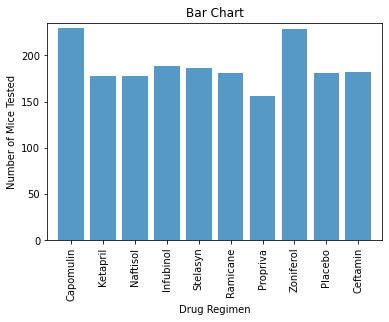

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugRegimen = mouse_study_combined_cleaned2["Drug Regimen"].unique()
mouse_study_combined_cleaned_count = mouse_study_combined_cleaned_grouped["Tumor Volume (mm3)"].count()


x_axis = np.arange(0, len(drugRegimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.xticks(rotation=90)
plt.title("Bar Chart")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xlim(-0.75, len(drugRegimen)-.25)
plt.ylim(0, max(mouse_study_combined_cleaned_count) + 5)

plt.bar(x_axis, mouse_study_combined_cleaned_count, alpha=0.75, align="center")
plt.xticks(tick_locations, drugRegimen)
plt.show()




<AxesSubplot:title={'center':'Bar Chart'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

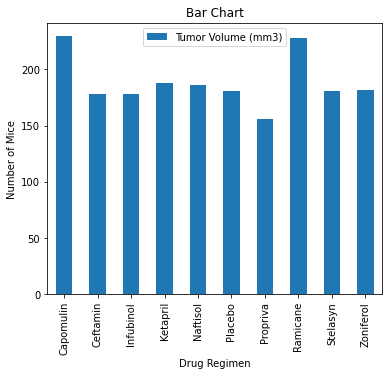

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
df = pd.DataFrame(mouse_study_combined_cleaned_count)
df.plot(kind='bar', title='Bar Chart', ylabel='Number of Mice',
         xlabel='Drug Regimen', figsize=(6, 5))

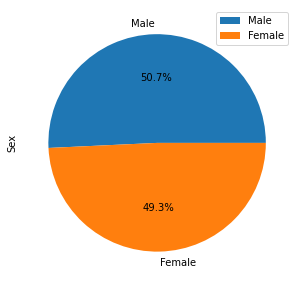

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

maleCount = mouse_study_combined_cleaned2.loc[mouse_study_combined_cleaned2["Sex"] == "Male"]
femaleCount = mouse_study_combined_cleaned2.loc[mouse_study_combined_cleaned2["Sex"] == "Female"]
totalCount = len(maleCount) + len(femaleCount)

maleCountPercent = (len(maleCount)/totalCount)*100
femaleCountPercent = (len(femaleCount)/totalCount)*100

df = pd.DataFrame({'Sex': [maleCountPercent, femaleCountPercent]},
                  index=['Male', 'Female'])
plot = df.plot.pie(y='Sex', autopct='%1.1f%%', figsize=(5, 5))
#plot = df.plot.pie(subplots=True, figsize=(11, 6))

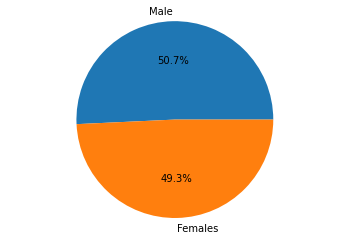

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'Male', 'Females'
sizes = [maleCountPercent, femaleCountPercent]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax1.axis('equal') 

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_study_combined_cleaned_tumor_count = mouse_study_combined_cleaned_grouped["Tumor Volume (mm3)"].count()
#mouse_study_combined_cleaned_tumor_count

# Start by getting the last (greatest) timepoint for each mouse

# Get unique mouse ids
uniqueMouse = mouse_study_combined_cleaned2["Mouse ID"].unique()
finalDF = pd.DataFrame()

# Loop through each mouse to get subset of values and use max function to get max timepoint value for each mouse  
for mouse in uniqueMouse:  
    mouseIdDF = mouse_study_combined_cleaned2.loc[mouse_study_combined_cleaned2["Mouse ID"] == mouse].max()
    finalDF = finalDF.append(mouseIdDF, ignore_index = True)

finalDF.head(40)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(mouseIdDF, ignore_index = True)
/var/folders/k3/29crq3tx23v635hzwr10k1sc0000gn/T/ipykernel_21817/2494320422.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,45.651331,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
5,h246,45,74.104086,2,Ketapril,Male,13,30
6,p189,45,75.294936,4,Ketapril,Male,8,28
7,n923,40,66.229606,3,Ketapril,Male,19,30
8,q119,10,51.236606,0,Ketapril,Male,17,30
9,f993,20,52.079510,1,Naftisol,Male,21,28


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drugVolume = mouse_study_combined_cleaned2.loc[mouse_study_combined_cleaned2["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
  
    # add subset 
    tumor_vol_list.append(drugVolume)
     
    
    # Determine outliers using upper and lower bounds
    quartiles = drugVolume.quantile([.25,.75])
    
    lowerq = np.quantile(quartiles, .25)
    upperq = np.quantile(quartiles, .75)
    iqr = upperq-lowerq
    #print(f"The IQR for {drug} is {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(f"Lower bound for {drug}: is {lower_bound} and upper bound is {upper_bound}")
    
    drugOutliers = drugVolume.loc[(drugVolume < lower_bound) | (drugVolume > upper_bound) ]
    
    print(f"{drug}'s potential outliers: {len(drugOutliers)}")

    
   
    

Capomulin's potential outliers: 30
Ramicane's potential outliers: 13
Infubinol's potential outliers: 18
Ceftamin's potential outliers: 17


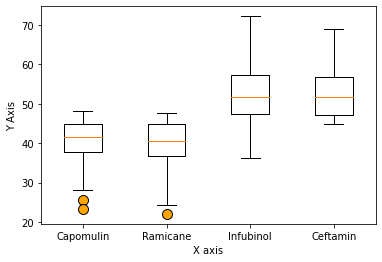

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

orange_out = dict(markerfacecolor="orange", markersize=10)
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=orange_out)
plt.xlabel("X axis")
plt.ylabel("Y Axis")
plt.show()


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

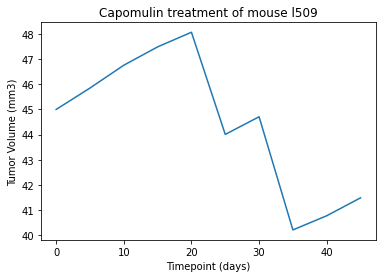

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_mouse_df = mouse_study_combined_cleaned2.set_index("Mouse ID")
tumor_volume = mouse_study_combined_cleaned2.loc[mouse_study_combined_cleaned2["Mouse ID"] == "l509"]
x_axis = np.arange(0,50,5)
plt.plot(x_axis, tumor_volume["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

The correlation between mouse weight and the average tumor volume is 0.53


Text(0.5, 1.0, 'Avg Tumor Volume vs Mouse Weight for Capomulin regimen')

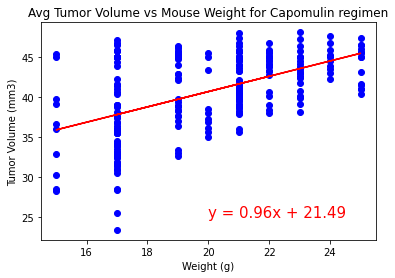

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = mouse_study_combined_cleaned2.loc[mouse_study_combined_cleaned2["Drug Regimen"] == "Capomulin"]

capomulin_weight = capomulin["Weight (g)"]
capomulin_tumor = capomulin["Tumor Volume (mm3)"]

correlation = st.pearsonr(capomulin_weight, capomulin_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight, capomulin_tumor)
regress_values = capomulin_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_weight, capomulin_tumor, marker="o", facecolor="b", edgecolor="b")
plt.plot(capomulin_weight,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Tumor Volume vs Mouse Weight for Capomulin regimen")



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
